**You can open the link to see all of my work on COLAB, because some cells of this notebook don't show the results**
https://colab.research.google.com/drive/1PxPNAV6fw7_vyGS22a9EZu4aUD8i0J_Y?usp=sharing

In [ ]:
#!pip install pyLDAvis

In [ ]:
import numpy as np
import pandas as pd
import math,random
from collections import defaultdict
import curses
import time
import copy
import queue
import heapq
import datetime
import itertools
from matplotlib.animation import PillowWriter  
import networkx as nx
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from matplotlib import animation, rc
import nltk
nltk.download('punkt')
import string 
import multiprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
# spacy for lemmatization
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Before starting the class

## Function sliding window
ถ้า window=3 กับ input [1,2,3,4,5] 

จะได้ [1,2,3] [2,3,4] [3,4,5]

In [ ]:
def sliding_window (input_list, window_size):
  output_list = []
  max_point = len(input_list) - window_size + 1
  for i in range(max_point):
    output_list.append(input_list[i : i+window_size])
  return output_list

In [ ]:
input_list = [1, 2, 3, 4, 5]
window_size = 5

In [ ]:
sliding_window(input_list,window_size)

[[1, 2, 3, 4, 5]]

# A. Thanaruk's quiz

### 0). Find max value in List

In [ ]:
def bubble_sort(input_list): 
    n = len(input_list) 
    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if input_list[j] > input_list[j+1] : 
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
    print ("Sorted list is "+str(input_list)) 
    print("\nMax : "+str(input_list[-1])) #-1 = last index

In [ ]:
input_list = [5, 4, 3, 2, 1, 0]
bubble_sort(input_list)

Sorted list is [0, 1, 2, 3, 4, 5]

Max : 5


### 1). 8 Puzzle with A* Algorithm

**f-score = h-score + g-score**

when **h-score** as the number of misplaced tiles by comparing the current state and the goal state or summation of the Manhattan distance between misplaced nodes.
**g-score** will remain as the number of nodes traversed from a start node to get to the current node. 

https://blog.goodaudience.com/solving-8-puzzle-using-a-algorithm-7b509c331288

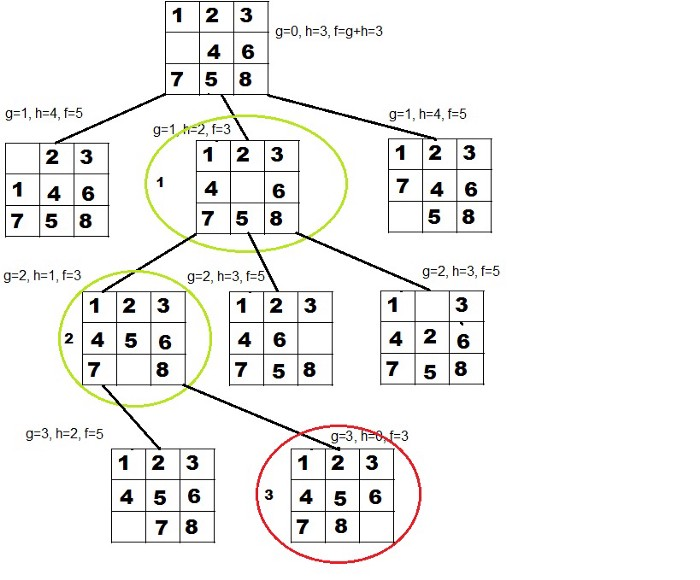








In [ ]:
initital_list = [[1, 2, 3],
                     [0, 4, 6],
                     [7, 5, 8]]
goal_list = [[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 0]]

In [ ]:
def isSolvable(puzzle):
  array = list(itertools.chain.from_iterable(puzzle))
  #print(array)
  inv_count = 0
  for i in range(8):
    for j in range(i + 1, 9):
      if array[j] != 0 and array[i] != 0 and array[i] > array[j]:
        inv_count += 1
    #print("cnt:",invCount)
    return inv_count % 2 == 0

In [ ]:
isSolvable(initital_list)

True

In [ ]:
def print_puzzle(input_list):
    for row in range(len(input_list)):
        temp = ""
        for column in range(len(input_list[0])):
            if input_list[row][column] == 0:
                temp += f"e "
            else:
                temp += f"{input_list[row][column]} "
        print(temp)

In [ ]:
print_puzzle([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

1 2 3 
4 5 6 
7 8 e 


In [ ]:
def convert_2d_to_1d_list(two_d_list):
  return [j for sub in two_d_list for j in sub]

def copy_list(input_list):
    new_list = []
    for row in range(len(input_list)):
        row_list = []
        for column in range(len(input_list[0])):
            row_list.append(input_list[row][column])
        new_list.append(row_list)
    return new_list

In [ ]:
convert_2d_to_1d_list([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

[1, 2, 3, 4, 5, 6, 7, 8, 0]

In [ ]:
copy_list([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

[[1, 2, 3], [4, 5, 6], [7, 8, 0]]

In [ ]:
def is_goal_state(puzzle_1d_list ,goal_list):
    return puzzle_1d_list == goal_list

In [ ]:
is_goal_state(initital_list, goal_list)

False

In [ ]:
class Puzzle():
    def __init__(self, number_list, state_level, parent=None):
        self.parent = parent
        self.number_list = number_list
        self.number_list = number_list
    
    def cost(self, goal_list):
        list_1d = convert_2d_to_1d_list(self.number_list)
        goal_list_1d = convert_2d_to_1d_list(goal_list)
        cost = 0
        
        for index in range(len(list_1d)):
            if list_1d[index] != goal_list_1d[index]:
                cost += 1
                
        cost += self.state_level
        return cost
    
    ## look up zero value, then return its index
    def possile_move(self):
        for row in range(len(self.number_list)):
            for column in range(len(self.number_list[0])):
                if self.number_list[row][column] == 0:
                    return (row, column)
    
    ## Move 0(e)
    def possible_puzzle(self):
        all_posible = []
        row, column = self.possile_move()
        row_length = len(self.number_list)
        column_length = len(self.number_list[0])
        
        if row + 1 < row_length: #U
            new_list = copy_list(self.number_list)
            new_list[row][column] = new_list[row + 1][column]
            new_list[row + 1][column] = 0
            new_list = Puzzle(number_list=new_list, state_level=self.state_level + 1, parent=self)
            all_posible.append(new_list)
        
        if row - 1 >= 0: #D
            new_list = copy_list(self.number_list)
            new_list[row][column] = new_list[row - 1][column]
            new_list[row - 1][column] = 0
            new_list = Puzzle(number_list=new_list, state_level=self.state_level + 1, parent=self)
            all_posible.append(new_list)
            
        if column + 1 < column_length: #R
            new_list = copy_list(self.number_list)
            new_list[row][column] = new_list[row][column + 1]
            new_list[row][column + 1] = 0
            new_list = Puzzle(number_list=new_list, state_level=self.state_level + 1, parent=self)
            all_posible.append(new_list)
            
        if column - 1 >= 0: #L
            new_list = copy_list(self.number_list)
            new_list[row][column] = new_list[row][column - 1]
            new_list[row][column - 1] = 0
            new_list = Puzzle(number_list=new_list, state_level=self.state_level + 1, parent=self)
            all_posible.append(new_list)
                           
        return all_posible

In [ ]:
goal_list = [[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 0]]
print_puzzle(goal_list)

1 2 3 
4 5 6 
7 8 e 


In [ ]:
initital_list = [[1, 2, 3],
                     [0, 4, 6],
                     [7, 5, 8]]
print_puzzle(initital_list)

1 2 3 
e 4 6 
7 5 8 


In [ ]:
puzzle = Puzzle(initital_list, state_level=0)
puzzle.possile_move()

(1, 0)

In [ ]:
all_possible = puzzle.possible_puzzle()
print("=====")
for node in all_possible:
    print_puzzle(node.number_list)
    print("=====")

=====
1 2 3 
7 4 6 
e 5 8 
=====
e 2 3 
1 4 6 
7 5 8 
=====
1 2 3 
4 e 6 
7 5 8 
=====


In [ ]:
def puzzle(initital_list, goal_list):
    if(isSolvable(initital_list)):
      print("**This puzzle can be solved***")
      puzzle_o= Puzzle(initital_list, state_level=0)
      all_puzzle = [puzzle_o]
      visited_puzzle = []

    
      print("\nInitial State")
      print_puzzle(initital_list)
      print("\nGoal State")
      print_puzzle(goal_list)
    
      answer_puzzle = None

      while True:
          if len(all_puzzle) == 0:
              print("Can't find out answer")
              break
          temp = all_puzzle.pop()
          check = [convert_2d_to_1d_list(temp.number_list) == convert_2d_to_1d_list(node.number_list) for node in visited_puzzle]
          
          if True in check and len(check) != 0: 
            continue
          visited_puzzle.append(temp)
          if is_goal_state(temp.number_list ,goal_list):
              answer_puzzle = temp
              break
          all_possible = temp.possible_puzzle()
          all_puzzle += all_possible
          all_puzzle.sort(key=lambda x: x.cost(goal_list), reverse=True)
          
          
      if answer_puzzle is None: 
        return
      else:
        sol_path = [answer_puzzle]
        parent_puzzle = answer_puzzle
        while True:
            if parent_puzzle.parent is not None:
                parent_puzzle = parent_puzzle.parent
                sol_path.append(parent_puzzle)
            else:
                break
        
        sol_path.reverse()

        
        print("\nPath")
        print("=====")
        for p in sol_path:
            print(f"cost: {p.cost(goal_list)}")
            print_puzzle(p.number_list)
            print("=====")
            print("||")
            print("\/")
        print("Done")
    else:
      print("This puzzle can not be solved")


In [ ]:
puzzle(initital_list, goal_list)

**This puzzle can be solved***

Initial State
1 2 3 
e 4 6 
7 5 8 

Goal State
1 2 3 
4 5 6 
7 8 e 

Path
=====
cost: 4
1 2 3 
e 4 6 
7 5 8 
=====
||
\/
cost: 4
1 2 3 
4 e 6 
7 5 8 
=====
||
\/
cost: 4
1 2 3 
4 5 6 
7 e 8 
=====
||
\/
cost: 3
1 2 3 
4 5 6 
7 8 e 
=====
||
\/
Done


###  2). Depth First Search

In [ ]:
def depth_first_search(root, node, next_nodes, path_order, path):
  path = path + [node]
  path_order.append(path)
  new_next_nodes = next_nodes.get(node)
  if new_next_nodes != None:
    for n in next_nodes[node]:
      if n != root:
        dfs(next_nodes, n, next_nodes, path_order, path)

In [ ]:
def generate_network(root,edges):
  nodes = set()
  #print(type(nodes))
  next_nodes = {}
  #print(type(next_nodes))

  for e in edges:
    nodes.add(e[0])
    nodes.add(e[1])
    if next_nodes.get(e[0]) == None:
      next_nodes[e[0]] = []
    if next_nodes.get(e[1]) == None:
      next_nodes[e[1]] = []
    next_nodes[e[0]].append(e[1])
    next_nodes[e[1]].append(e[0])
  nodes = list(nodes)
  path_order = []

  dfs(next_nodes,[],path_order,root,-1)

  return nodes,next_nodes,path_order

In [ ]:
edges = [[1, 2], [1, 3], [1, 4], [1, 5], [2, 6], [2, 7], [3, 8], [4, 9], [4, 10], [5, 11], 
         [6, 12], [6, 13], [7, 14], [9, 15], [10, 16], [10, 17], [11, 18]]

In [ ]:
nodes,next_nodes,path_order  = generate_network(1,edges)

<class 'set'>
<class 'dict'>


In [ ]:
#nodes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
#next_nodes

{1: [2, 3, 4, 5],
 2: [1, 6, 7],
 3: [1, 8],
 4: [1, 9, 10],
 5: [1, 11],
 6: [2, 12, 13],
 7: [2, 14],
 8: [3],
 9: [4, 15],
 10: [4, 16, 17],
 11: [5, 18],
 12: [6],
 13: [6],
 14: [7],
 15: [9],
 16: [10],
 17: [10],
 18: [11]}

In [ ]:
#path_order

[[1],
 [1, 2],
 [1, 2, 6],
 [1, 2, 6, 12],
 [1, 2, 6, 13],
 [1, 2, 7],
 [1, 2, 7, 14],
 [1, 3],
 [1, 3, 8],
 [1, 4],
 [1, 4, 9],
 [1, 4, 9, 15],
 [1, 4, 10],
 [1, 4, 10, 16],
 [1, 4, 10, 17],
 [1, 5],
 [1, 5, 11],
 [1, 5, 11, 18]]

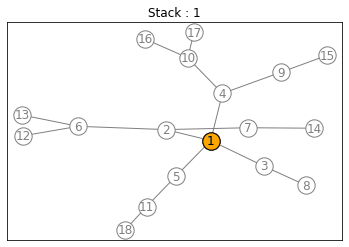

In [ ]:
# Create Graph
np.random.seed(38) #ทำให้กราฟที่พล็อตอยู่กับที่
G = nx.Graph() #สร้างกราฟ
G.add_nodes_from(nodes) #สร้าง node ในกราฟ
for e in edges: #สร้าง edge ในกราฟ
  G.add_edge(e[0],e[1])
pos = nx.spring_layout(G) #สร้างตำแหน่ง x,y ของแต่ละโหนดออกมาเป็น dictionary

# Build plot
fig, ax = plt.subplots(figsize=(6,4))

visited = set() #สำหรับเก็บ Node ที่ไปแล้ว
visitedEdge = [] #สำหรับเก็บ Edge ที่ไปแล้ว

def update(num):
    ax.clear() #ล้างหน้าจอ ถ้าไม่ล้าง ภาพจะซ้อนกัน

    path = path_order[num] #เอา path ของเฟรมที่ num ออกมา
    if len(path) > 0: #ถ้ามี node ใน path เช็ค node ล่าสุดว่าไปแล้ว
      visited.add(path[-1])

    if len(path) > 1: #ถ้ามี node 2 อันขึ้นไปใน path เช็ค edge (edge ระหว่าง 2 โหนด) ล่าสุดว่าไปแล้ว
      visitedEdge.append([path[-2],path[-1]])

    # not Visit nodes
    notVisitNodes = list(set(G.nodes()) - set(path) - visited) #หาลิสต์ของโหนดที่ยังไม่ได้ไป
    # วาด edge                         \/ ใส่ลิสต์ของ edge ที่จะวาด  \/ ใส่สีของ edge
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, ax=ax, edge_color="gray")
    # วาด edge                         \/ ใส่ลิสต์ของ edge ที่จะวาด  \/ ใส่สีของ edge
    null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=notVisitNodes, node_color="white",  ax=ax)
    #          \/ ใส่สีขอบ node
    null_nodes.set_edgecolor("Gray")
    # แปะฉลากให้โหนด                    \/ ป้อนโหนดที่ต้องการจะแปะฉลาก โดยใช้ dict ของ node:ฉลาก     \/ ใส่สีฉลากของโหนด
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(notVisitNodes, notVisitNodes)),  font_color="Gray", ax=ax)

    # Visited nodes
    nx.draw_networkx_edges(G, pos=pos, edgelist=visitedEdge, ax=ax, edge_color="Green")
    visited_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=visited, node_color="Green",  ax=ax)
    visited_nodes.set_edgecolor("black")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(list(visited), list(visited))),  font_color="White", ax=ax)

    # Query nodes
    query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color="Yellow", ax=ax)
    query_nodes.set_edgecolor("Gray")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="Gray", ax=ax)
    currEdgelist = [path[k:k+2] for k in range(len(path) - 1)]

    # แปะฉลากให้โหนด                                                               \/ ความหนาเส้น
    nx.draw_networkx_edges(G, pos=pos, edgelist=currEdgelist, edge_color="Blue", width=3, ax=ax)

    # Current Node
    current_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path[-1:], node_color="Orange", ax=ax)
    current_nodes.set_edgecolor("black")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path[-1:],path[-1:])),  font_color="Black", ax=ax)
    
    # Scale plot ax
    if num != len(path_order)-1: # ตั้ง titile
      ax.set_title("Stack : " + ", ".join([str(x) for x in path]))
    else :
      ax.set_title("Depth First Search Animation")
    ax.set_xticks([])
    ax.set_yticks([])

#animate
ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(path_order), interval=500, repeat=True)
rc('animation', html='jshtml')

In [ ]:
ani

In [ ]:
writer = PillowWriter(fps=10)  
ani.save("bfs.gif", writer=writer) 

### 3). Visulization

**Topic Modeling Visualization with Latent Dirichlet Allocation**

dataset: https://www.kaggle.com/kerneler/starter-ted-ultimate-dataset-895bfdd1-0/data

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/AiAT/week1
%ls

/content/drive/My Drive/Colab Notebooks/AiAT/week1
22p25w0080_boonrit_8puzzle_19092020.ipynb  puzzle.ipynb
22p25w0080_boonrit_hwweek1_19092020.ipynb  puzzle.py
22p25w0080_boonrit_quizz1_19092020.ipynb   ted_talks_en.csv


In [ ]:
all_data = pd.read_csv("ted_talks_en.csv")

In [ ]:
all_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
len(all_data)

4005

In [ ]:
all_data['title'].value_counts()

You are your microbes                            1
Ancient Rome's most notorious doctor             1
A memorial at Ground Zero                        1
Optical illusions show how we see                1
Health and the human mind                        1
                                                ..
How low-cost eye care can be world-class         1
Why I love vultures                              1
How we experience time and memory through art    1
A look inside the brain in real time             1
Pay attention to nonviolence                     1
Name: title, Length: 4005, dtype: int64

In [ ]:
all_data['speaker_1'].value_counts()

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Hans Rosling        10
                    ..
Aris Venetikidis     1
David Christian      1
Rebecca Knill        1
Tony Fadell          1
Max Tegmark          1
Name: speaker_1, Length: 3274, dtype: int64

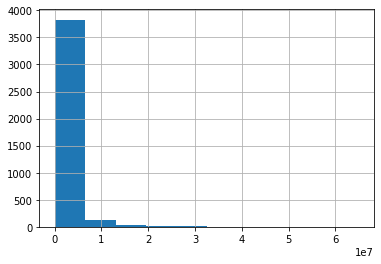

In [ ]:
all_data['views'].hist()

In [ ]:
all_data['views'].max()

65051954

In [ ]:
all_data['views'].min()

0

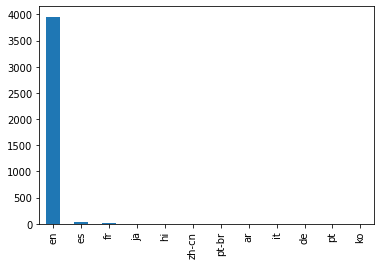

In [ ]:
all_data['native_lang'].value_counts().plot(kind='bar')

In [ ]:
all_data = all_data[all_data['native_lang']=='en']

In [ ]:
all_topic = all_data['topics'].values.tolist()

In [ ]:
all_topic[0][1:-1]

"'alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology'"

In [ ]:
transcript_lines = list()
lines = all_data['transcript'].values.tolist()
max_len = 0
#vocab_size = []
for line in lines:
    line = line.replace('<br />', '')
    tokens = word_tokenize(line)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    #print(tokens)
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    if(len(words) > max_len):
        max_len = len(words)
        
    transcript_lines.append(words)
    
#print(max_len)
len(transcript_lines)

3957

In [ ]:
def plot_word_clound(df, max_word):
  comment_words = ''
  stopwords = set(STOPWORDS) 
  # iterate through the csv file 
  for val in df['transcript']: 
        
      # typecaste each val to string 
      val = str(val) 
    
      # split the value 
      tokens = val.split() 
        
      # Converts each token into lowercase 
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                        max_words=max_word, 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
      
  plt.show() 

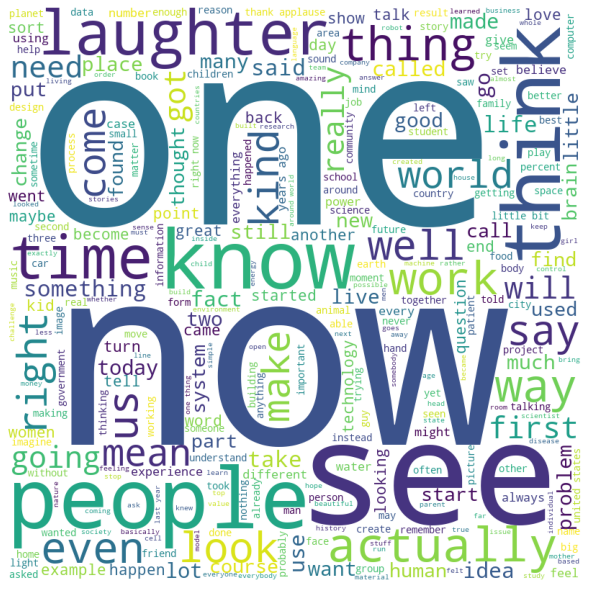

In [ ]:
plot_word_clound(all_data, 1000)

In [ ]:
count = []
for i in range(len(transcript_lines)):
  count.append(len(transcript_lines[i]))

In [ ]:
max_value = max(count)
min_value = min(count)
print(max_value)
print(min_value)

11446
2


In [ ]:
trans_temp = []
for i in range(len(transcript_lines)):
  trans_temp.append(" ".join(transcript_lines[i]))

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_lemmatized = lemmatization(transcript_lines)

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=35,random_state=38,update_every=1,chunksize=100,
                                           passes=10,alpha='auto')
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.243080  0.058300       1        1  24.704550
28     0.218961  0.141342       2        1  11.071087
2      0.225461 -0.028690       3        1   7.327112
27     0.199444  0.102783       4        1   6.113657
6      0.155986  0.106625       5        1   5.233128
22     0.203937  0.052743       6        1   4.671139
30     0.181059 -0.049786       7        1   4.123797
33     0.141521 -0.094815       8        1   3.381433
23     0.119016  0.002128       9        1   2.697979
26     0.034335  0.047899      10        1   2.675095
13     0.037638  0.089092      11        1   2.477479
34     0.118437 -0.110953      12        1   2.444798
0      0.078814 -0.035768      13        1   2.396609
5      0.111353 -0.111986      14        1   2.353544
20    -0.004934  0.215910      15        1   1.978882
9      0.106962 -0.089056      16        1   1.721607
7     -0.015467 -0.077293      17        1   1.519500
21     0.058669 -0.186314      18        1   1.209597
14    -0.005018 -0.231745      19        1   1.187626
8     -0.029066 -0.016009      20        1   1.161683
1     -0.078208  0.165104      21        1   1.095534
3     -0.145402  0.044377      22        1   1.048806
24    -0.066037  0.047303      23        1   1.018746
19    -0.028656  0.111237      24        1   0.937422
17    -0.082377  0.018415      25        1   0.837442
31    -0.108369  0.119912      26        1   0.809041
11    -0.126327 -0.135094      27        1   0.744915
15    -0.028670 -0.007531      28        1   0.726239
4     -0.049621 -0.100323      29        1   0.582204
25    -0.148452 -0.172640      30        1   0.491901
29    -0.228226  0.042256      31        1   0.458738
16    -0.244082  0.073689      32        1   0.311809
10    -0.269425  0.012925      33        1   0.241660
12    -0.284625  0.000640      34        1   0.146705
32    -0.291711 -0.004675      35        1   0.098533, topic_info=           Term          Freq         Total Category  logprob  loglift
227    laughter  11184.000000  11184.000000  Default  30.0000  30.0000
321      people  27883.000000  27883.000000  Default  29.0000  29.0000
389           s  67754.000000  67754.000000  Default  28.0000  28.0000
59          can  36024.000000  36024.000000  Default  27.0000  27.0000
504        work  15940.000000  15940.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
50683      talo     13.110121     14.187381  Topic35  -5.5591   6.8436
17201     shiva     12.978963     14.056223  Topic35  -5.5692   6.8428
47641      loki     12.565534     13.642794  Topic35  -5.6016   6.8403
8473   dinosaur    126.651932    206.697510  Topic35  -3.2911   6.4327
5005     fusion     25.244938     57.733871  Topic35  -4.9039   6.0953

[2351 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1722      1  0.036071  ability
1722      3  0.176159  ability
1722      4  0.211391  ability
1722      6  0.092274  ability
1722      7  0.010905  ability
...     ...       ...      ...
514      14  0.020141    young
514      15  0.393738    young
514      16  0.001185    young
514      17  0.003554    young
514      21  0.135853    young

[7308 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 29, 3, 28, 7, 23, 31, 34, 24, 27, 14, 35, 1, 6, 21, 10, 8, 22, 15, 9, 2, 4, 25, 20, 18, 32, 12, 16, 5, 26, 30, 17, 11, 13, 33])

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# credit plot network animation : https://colab.research.google.com/drive/1N-GshkkdBemceT9CEXi4EAzSlgxYRvCN?usp=sharing#scrollTo=cxiaTzWgU4Tz